<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# ARMA Examples

--- 

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AR(p)-process:" data-toc-modified-id="AR(p)-process:-1">AR(p) process:</a></span><ul class="toc-item"><li><span><a href="#An-AR(1)-example" data-toc-modified-id="An-AR(1)-example-1.1">An AR(1) example</a></span></li><li><span><a href="#MA(1)-example" data-toc-modified-id="MA(1)-example-1.2">MA(1) example</a></span></li></ul></li><li><span><a href="#ARMA(p,q)-process" data-toc-modified-id="ARMA(p,q)-process-2">ARMA(p,q) process</a></span></li><li><span><a href="#Simulating-time-series" data-toc-modified-id="Simulating-time-series-3">Simulating time series</a></span><ul class="toc-item"><li><span><a href="#Create-an-ARMA-process" data-toc-modified-id="Create-an-ARMA-process-3.1">Create an ARMA process</a></span></li><li><span><a href="#Theoretical-ACF-and-PACF-values" data-toc-modified-id="Theoretical-ACF-and-PACF-values-3.2">Theoretical ACF and PACF values</a></span></li><li><span><a href="#Generate-a-sample" data-toc-modified-id="Generate-a-sample-3.3">Generate a sample</a></span></li><li><span><a href="#Sample-ACF-and-PACF-versus-theoretical-values" data-toc-modified-id="Sample-ACF-and-PACF-versus-theoretical-values-3.4">Sample ACF and PACF versus theoretical values</a></span></li><li><span><a href="#Fit-ARIMA-model-on-generated-sample" data-toc-modified-id="Fit-ARIMA-model-on-generated-sample-3.5">Fit ARIMA model on generated sample</a></span></li><li><span><a href="#Practice" data-toc-modified-id="Practice-3.6">Practice</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import statsmodels.api as sm

## AR(p) process:

General form:

$$
\begin{eqnarray*}
y_t&=&\phi_0+\phi_1 y_{t-1}+\ldots+\phi_p y_{t-p}+\epsilon_t\\
\phi_0&=&(1-(\phi_1+\ldots+\phi_p))\mu
\end{eqnarray*}
$$


### An AR(1) example

For an AR(1)-model, this equation would look like

$$
\begin{eqnarray*}
y_t &=& \phi_0 + \phi_1  y_{t-1} +\ \epsilon_t
\end{eqnarray*}
$$

with 

$$\phi_0=\left(1-\phi_1\right)\mu$$

Let's say, we have a single starting value for a time series, we know the mean and the coefficient $\phi_1$. Then we can predict all the other points in the time series up to the residual term.

Consider for example the values

$$
\begin{eqnarray*}
\mu &=& 1\\
\phi_1 &=& -0.8\\
y_0 &=& 0
\end{eqnarray*}
$$

That means 

$$
\phi_0 = (1-(-0.8))\cdot 1 = 1.8
$$

Then for $y_1$ we would predict

$$
y_1 = 1.8 + (-0.8)\cdot 0 + \epsilon_1
$$

For $\epsilon_t$, we will always make the prediction
$\epsilon_t=0$ as it is completely random, so we do not know better than to predict its mean, which is zero.
Therefore we predict

$$
y_1 = 1.8
$$

In the same way, we would predict $y_2$, being ignorant about the noise term, based on $y_1$:

$$
y_2 = 1.8 + (-0.8)\cdot 1.8 = 0.36
$$

We could go on to predict all the other points. All what we needed to do so were the coefficients and one starting value for the time series.

### MA(1) example

Let's say we have 

$$
\begin{eqnarray*}
\mu &=& 10 \\
\theta_1 &=& 0.5 \\
y_0 &=& 5 \\
\epsilon_0 &=& 3
\end{eqnarray*}
$$

Then we would predict

$$
\begin{eqnarray*}
y_1 &=& \mu + \theta_1\cdot \epsilon_{0}
= 10+0.5\cdot 3 = 11.5\\
\epsilon_1 &=& 0 
\end{eqnarray*}
$$

predicting again the mean (i.e. zero) for the random noise term $\epsilon_1$.

Then 

$$
\begin{eqnarray*}
y_2 &=& \mu + \theta_1\cdot \epsilon_{1}
= 10+0.5\cdot 0 = 10\\
y_3 &=& 10 
\end{eqnarray*}
$$

and so forth.

## ARMA(p,q) process

The general ARMA(p,q) process combines AR(p) and MA(q):

$$y_t=\phi_0+\phi_1 y_{t-1}+\ldots+\phi_p y_{t-p}+\theta_1\epsilon_{t-1}+\ldots+\theta_q\epsilon_{t-q}+\epsilon_t$$

## Simulating time series

### Create an ARMA process

Set a numpy array for containing the coefficients of the AR and MA parts.

In [2]:
arma_process = sm.tsa.ArmaProcess.from_coeffs(
    arcoefs=np.array([0.5]), 
    macoefs=np.array([0]), 
    nobs=100)

### Theoretical ACF and PACF values

In [3]:
arma_process.acf(lags=10)

array([1.        , 0.5       , 0.25      , 0.125     , 0.0625    ,
       0.03125   , 0.015625  , 0.0078125 , 0.00390625, 0.00195312])

In [4]:
arma_process.pacf(lags=10)

array([1. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

### Generate a sample

Fix parameters:

- `nsample`: number of observations generated
- `scale`: standard deviation of residuals
- `burnin`: discard first generated samples for independence of starting value

In [5]:
sample = arma_process.generate_sample(nsample=100, scale=0.1, burnin=1000)
sample.shape

(100,)

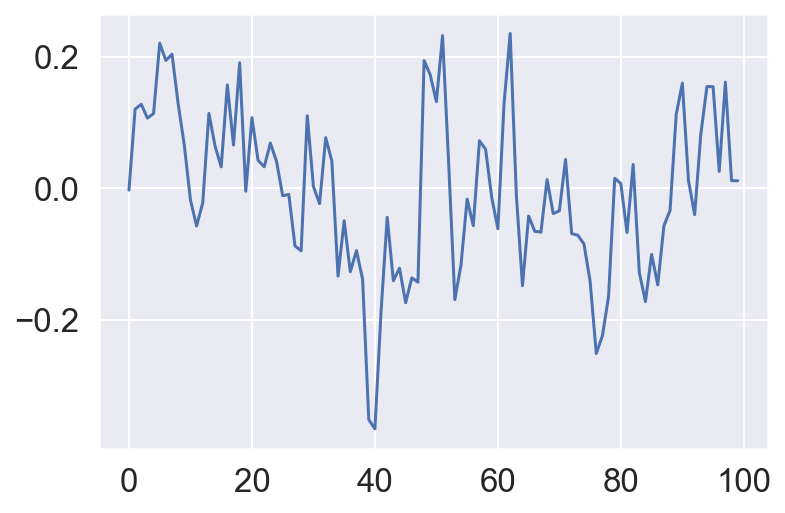

In [6]:
plt.plot(sample)
plt.show()

### Sample ACF and PACF versus theoretical values

The sample ACF and PACF differ from the theoretical ones.

In [7]:
sm.tsa.acf(sample, nlags=10, fft=True)

array([1.        , 0.65127416, 0.40150347, 0.29990984, 0.19319098,
       0.12360477, 0.15950888, 0.14401377, 0.08503885, 0.05987959,
       0.04412867])

In [8]:
sm.tsa.pacf(sample, nlags=10)

array([ 1.00000000e+00,  6.57852689e-01, -4.06761800e-02,  9.79367254e-02,
       -5.69774871e-02,  1.23475960e-02,  1.40298459e-01, -2.74874684e-02,
       -4.21586514e-02, -1.35767968e-05, -8.95931350e-04])

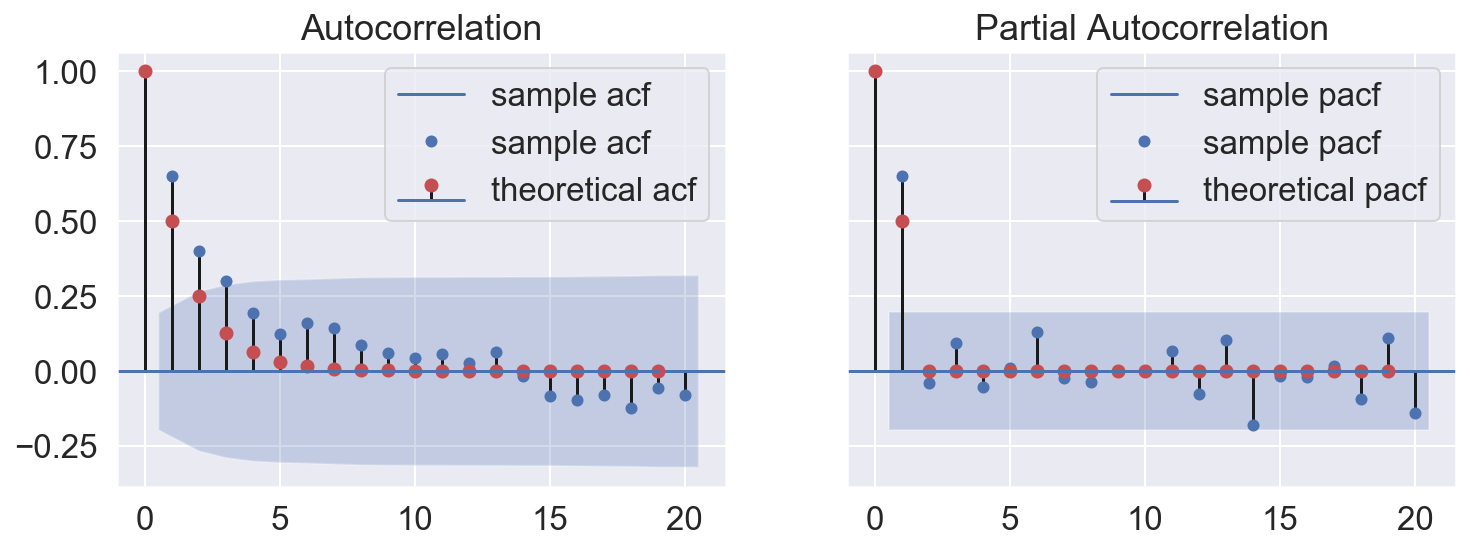

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

sm.graphics.tsa.plot_acf(sample, ax=ax[0], label='sample acf')
ax[0].stem(arma_process.acf()[:20], 
           linefmt='--k', basefmt='b', markerfmt='ro', 
           use_line_collection=True, label='theoretical acf')
ax[0].legend()

sm.graphics.tsa.plot_pacf(sample, method='ywmle', ax=ax[1], label='sample pacf')
ax[1].stem(arma_process.pacf()[:20], 
           linefmt='--k', basefmt='b', markerfmt='ro', 
           use_line_collection=True, label='theoretical pacf')
ax[1].legend()

plt.show()

### Fit ARIMA model on generated sample

We can fit an ARIMA model to the sample.

In [10]:
from statsmodels.tsa.arima_model import ARIMA, ARMA

In [11]:
model = ARIMA(sample, order=(1, 0, 0))
results = model.fit(startparams=[0], trend='nc', method='css', maxiter=50000)
# nc stands for having no constant trend
# alternative (default) is c for constant


results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 0)   Log Likelihood                  94.009
Method:                           css   S.D. of innovations              0.094
Date:                Sun, 09 Feb 2020   AIC                           -184.018
Time:                        16:43:52   BIC                           -178.827
Sample:                             1   HQIC                          -181.918
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.6518      0.076      8.551      0.000       0.502       0.801
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5342           +0.0000j            1.5342            0.0000
-----------------------------------------------------------------------------
"""

### Practice

Experiment with different ARMA coefficients. What is the impact on the ACF/PACF?